In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
import matplotlib
matplotlib.style.use("ggplot")

In [17]:
data = pd.read_csv("../data/train.csv")
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [18]:
data.shape

(140700, 20)

In [19]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(
    data, test_size=0.2, random_state=42
)

In [21]:
data_train.shape

(112560, 20)

In [22]:
data_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
33707,33707,Rohan,Male,55.0,Bangalore,Working Professional,Teacher,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Unhealthy,B.Ed,No,4.0,2.0,Yes,0
133592,133592,Kunal,Male,54.0,Thane,Working Professional,Teacher,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Healthy,M.Com,No,11.0,4.0,Yes,0
113169,113169,Sai,Male,48.0,Lucknow,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,More than 8 hours,Moderate,M.Tech,No,3.0,1.0,Yes,0
42896,42896,Anand,Male,24.0,Nagpur,Working Professional,Teacher,NaN,1.0,NaN,NaN,1.0,7-8 hours,Unhealthy,B.Arch,Yes,8.0,5.0,No,0
82457,82457,Kush,Male,38.0,Meerut,Working Professional,NaN,NaN,4.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,0.0,2.0,No,0


Remove id, Name from train and test data

In [23]:
data_train = data_train.drop(["id", "Name"], axis=1)
data_test = data_test.drop(["id", "Name"], axis=1)
data_train.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
33707,Male,55.0,Bangalore,Working Professional,Teacher,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Unhealthy,B.Ed,No,4.0,2.0,Yes,0
133592,Male,54.0,Thane,Working Professional,Teacher,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Healthy,M.Com,No,11.0,4.0,Yes,0
113169,Male,48.0,Lucknow,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,More than 8 hours,Moderate,M.Tech,No,3.0,1.0,Yes,0
42896,Male,24.0,Nagpur,Working Professional,Teacher,NaN,1.0,NaN,NaN,1.0,7-8 hours,Unhealthy,B.Arch,Yes,8.0,5.0,No,0
82457,Male,38.0,Meerut,Working Professional,NaN,NaN,4.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,0.0,2.0,No,0


In [24]:
data_train.isna().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               29334
Academic Pressure                        90207
Work Pressure                            22370
CGPA                                     90207
Study Satisfaction                       90206
Job Satisfaction                         22363
Sleep Duration                               0
Dietary Habits                               4
Degree                                       1
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
dtype: int64

### Gender

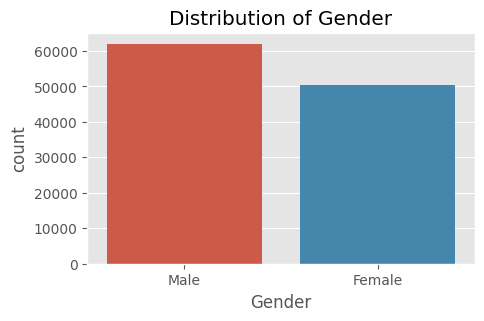

In [34]:
plt.figure(figsize=(5,3))
sns.countplot(data_train, x="Gender")
plt.title("Distribution of Gender")
plt.show()

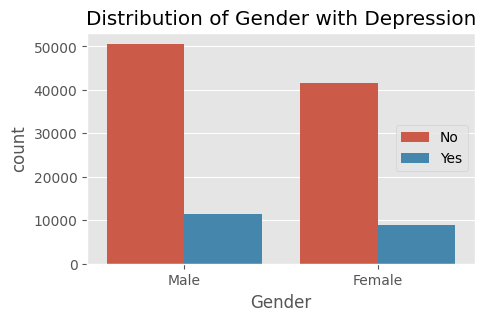

In [38]:
plt.figure(figsize=(5, 3))
sns.countplot(data_train, x="Gender", hue="Depression")
plt.title("Distribution of Gender with Depression")
plt.legend(["No", "Yes"], loc="right")
plt.show()

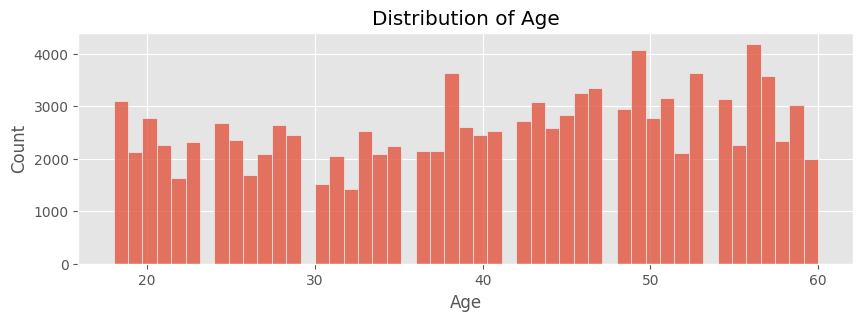

In [45]:
plt.figure(figsize=(10,3))
sns.histplot(data_train, x="Age")
plt.title("Distribution of Age")
plt.show()

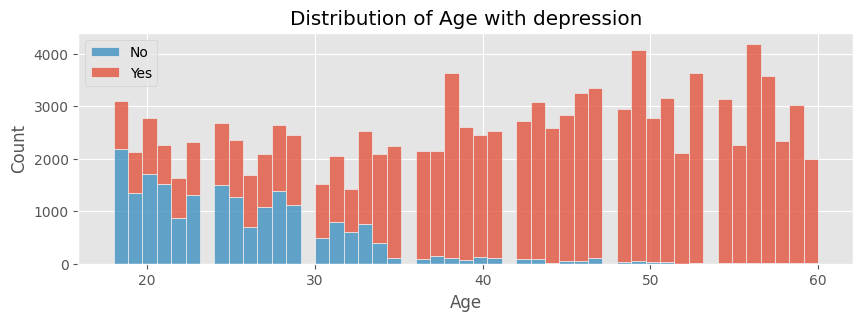

In [59]:
plt.figure(figsize=(10, 3))
sns.histplot(data_train, x="Age", hue="Depression", multiple="stack")
plt.title("Distribution of Age with depression")
plt.legend(["No", "Yes"])
plt.show()